In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
import math
%matplotlib inline

In [132]:
matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')
match_ids = matches[matches.season >= 2016]['id'].unique()
matches1 = matches[(matches.season >= 2016) & (matches['result']=='normal')]
matches1 = matches1.drop(['player_of_match','venue','umpire1','umpire2','umpire3', 'dl_applied', 'season', 'city', 'date', 'result'], axis=1)
matches1.dropna(inplace=True)

In [133]:
def team_correction(row):
    row = row.strip()
    if row == 'Delhi Daredevils':
        return 'Delhi Capitals'
    if row == 'Rising Pune Supergiants':
        return 'Rising Pune Supergiant'
    return row

for col in ['team1', 'team2', 'winner', 'toss_winner']:
    matches1[col] = matches1[col].apply(team_correction)
    

In [134]:
team_1 = 'Rajasthan Royals'
team_2 = 'Sunrisers Hyderabad'

# Winning Probability of Teams

Text(0.5, 1.0, 'SRH Total Runs Score Stats Per Count')

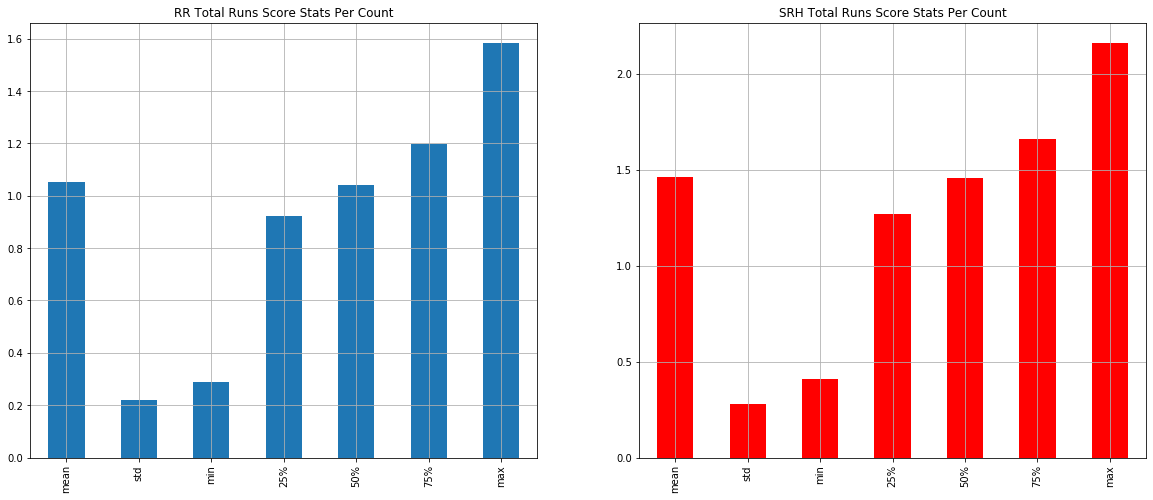

In [135]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
rr_runs = delivery[delivery['batting_team']==team_1].groupby('match_id').sum()['total_runs']
srh_runs = delivery[delivery['batting_team']==team_2].groupby('match_id').sum()['total_runs']
(rr_runs.describe()[1:]/rr_runs.describe()[0]).plot(ax=ax[0], kind='bar', grid=True)
(srh_runs.describe()[1:]/srh_runs.describe()[0]).plot(ax=ax[1], kind='bar', color='red', grid=True)
ax[0].set_title("RR Total Runs Score Stats Per Count")
ax[1].set_title("SRH Total Runs Score Stats Per Count")

The Dubai Cricket Stadium pitches seems to favour those who bat first and make them win. So, it depends upon who will bat first.

In [136]:
today = pd.DataFrame(matches1[(matches1['team1'].isin([team_1, team_2])) & (matches1['team2'].isin([team_1, team_2]))])
pd.crosstab(index=today['toss_winner'], columns=today['toss_decision'])

toss_decision,bat,field
toss_winner,,
Rajasthan Royals,1,1
Sunrisers Hyderabad,1,1


The probability of winning the toss is equal. So, considering recent matches, the probability of winning of RR is higher. 

# Rashid Khan balls to first wicket

In [137]:
delivery = delivery[delivery.match_id.apply(lambda x: True if x in match_ids else False)]
for col in ['batting_team', 'bowling_team']:
    delivery[col] = delivery[col].apply(team_correction)

delivery.fillna(0, inplace=True)
delivery['player_dismissed'] = delivery['player_dismissed'].apply(lambda x: 0 if x==0 else 1)

delivery['batsman_runs'] = delivery['batsman_runs'].apply(lambda x: x-1 if ((x==7) or (x==5)) else x)

In [138]:
rr_team = ['JC Buttler', 'SV Samson', 'SPD Smith', 'BA Stokes', 'RV Uthappa', 'R Parag', 'S Gopal', 'J Archer', 'JD Unadkat']
srh_team = ['DA Warner', 'J Bairstow', 'WP Saha', 'MK Pandey', 'KS Williamson', 'Rashid Khan', 'K Ahmed', 'T Natarajan', '']

Text(0.5, 1.0, 'Rashid Khan wickets against RR batsmen ')

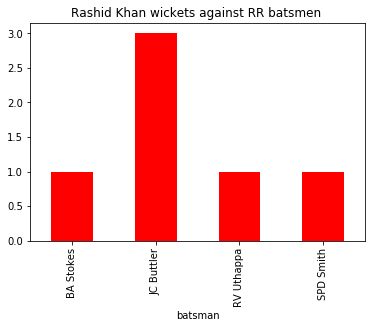

In [139]:
delivery[(delivery['bowler']=='Rashid Khan') & (delivery['batsman'].isin(rr_team)) & (delivery['player_dismissed']==1)].groupby('batsman').sum()['player_dismissed'].plot(kind='bar', color='red')
plt.title("Rashid Khan wickets against RR batsmen ")

,Balls to first wicket
mean,10.625000
std,5.846146
min,1.000000
25%,5.000000
50%,11.000000
75%,14.250000
max,20.000000


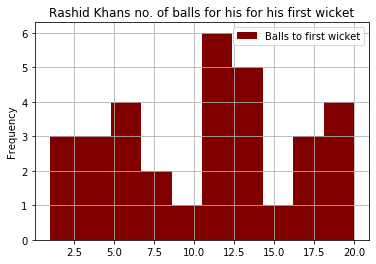

In [140]:
rkhan = delivery[(delivery['bowler']=='Rashid Khan')]
balls = list()
mat_id = list()
for match_id in rkhan.match_id.unique():
    ball = 0
    for dismiss in rkhan[rkhan['match_id']==match_id]['player_dismissed']:
        ball += 1
        if dismiss == 1:
            break
    if (ball <= 20):
        balls.append(ball)
        mat_id.append(match_id)
    
rkhan_wk = pd.DataFrame(index=mat_id, data=balls, columns=['Balls to first wicket'])
rkhan_wk.plot(kind='hist', grid=True, color='maroon')
plt.title("Rashid Khans no. of balls for his for his first wicket")
rkhan_wk.describe()[1:]

# David Warner Dismissal Kind

Text(0.5, 1.0, 'Warner dismissal kind againts RR bowlers')

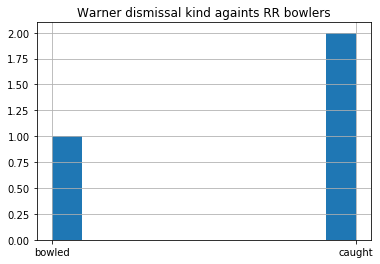

In [141]:
delivery[(delivery['batsman']=='DA Warner') & delivery['bowler'].isin(rr_team) & (delivery['player_dismissed']==1)]['dismissal_kind'].hist()
plt.title("Warner dismissal kind againts RR bowlers")

Text(0.5, 1.0, 'Warner dismissal kind in IPL')

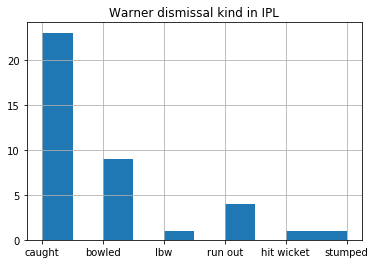

In [142]:
delivery[(delivery['batsman']=='DA Warner') & (delivery['player_dismissed']==1)]['dismissal_kind'].hist()
plt.title("Warner dismissal kind in IPL")

Text(0.5, 1.0, 'Warner dismissal kind againts all ipl bowlers')

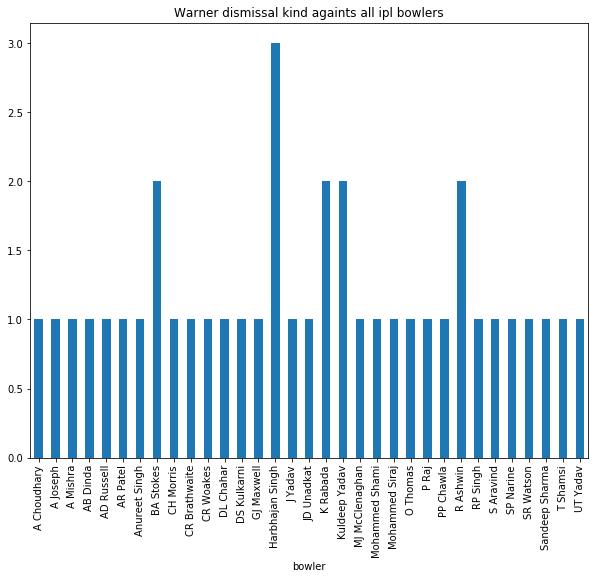

In [143]:
delivery[(delivery['batsman']=='DA Warner') & (delivery['player_dismissed']==1)].groupby('bowler').sum()['player_dismissed'].plot(kind='bar', figsize=(10,8))
plt.title("Warner dismissal kind againts all ipl bowlers")

These 3 plots suggest that BA stokes has a higher chance of taking wicket of David Warner and he will be caught.


# Bastman to Score Most Runs Today

In [144]:
batsman_count = delivery[(delivery['batting_team']==team_1) & (delivery['batsman'].isin(rr_team))].groupby('batsman').count()
batsman_sum = delivery[(delivery['batting_team']==team_1) & (delivery['batsman'].isin(rr_team))].groupby('batsman').sum()

Text(0.5, 1.0, 'Batsman Runs per batsmans dismissal')

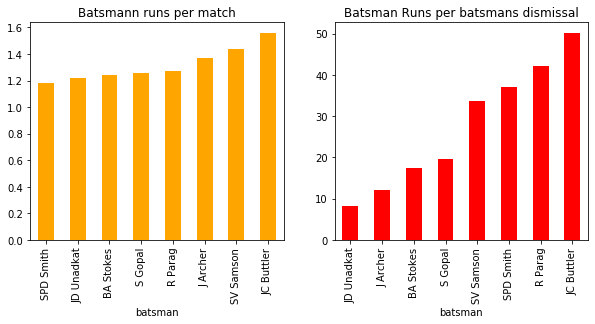

In [145]:
fig, ax= plt.subplots(1,2, figsize=(10, 4))
(batsman_sum['batsman_runs']/batsman_count['match_id']).sort_values().plot(ax=ax[0], kind='bar', color='orange')
(batsman_sum['batsman_runs']/batsman_sum['player_dismissed']).sort_values().plot(ax=ax[1], kind='bar', color='red')
ax[0].set_title("Batsmann runs per match")
ax[1].set_title("Batsman Runs per batsmans dismissal")

These two plots suggest that JC buttler has higher chances of hitting most runs for RR

# No. of no balls

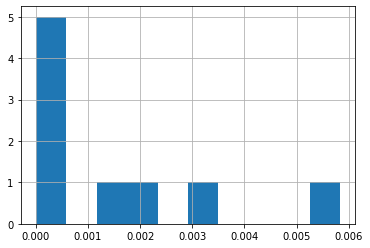

In [146]:
delivery[delivery['bowler'].isin(rr_team+srh_team)].groupby('bowler').mean()['noball_runs'].hist()

# Summary

- The central tendency measures of both the teams in regards of their scores per match were compared and toss winning chances were compared. Adding the recent playing stats of both the teams, the winning chances were estimated.
- The balls R Khan take for the first dismissal of a batsman per match was calculated and mean value was taken. Also, the stats of RR batsman against R Khan was graphed which suggested that there is a high possibility of R Khan to take a wicket. 
- David warner dismissal kind was plotted against all teams and RR which showed that BA Stokes has taken quite the majority of his wickets and he is majorly dismissed by caught. 
- The plot of Batsman runs per match in RR and batsman run per batsman wicket was taken out which suggested JC Buttler has higher chances to score most of the runs today for RR. 
- Today playing bowler's no balls per match was calculated and a histogram of this data suggested that the range would be between 0 to 1. 